In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
total_sales= {
    'region':np.random.choice(['North','South','East','West'],100),
    'sales':np.round(np.random.normal(10000,2000,100),2),
    'ad_spend':np.round(np.random.normal(5000,1000,100),2),
    'costumer_rating':np.round(np.random.uniform(1,5,100),2),
}                        

df=pd.DataFrame(total_sales)
df.to_csv('sales_data.csv',index=False) 

In [7]:
df=pd.read_csv('sales_data.csv')
print("Original Data Shape:",df.shape)

Original Data Shape: (100, 4)


In [8]:
df.loc[np.random.choice(df.index,10),'sales']=np.nan
df.loc[np.random.choice(df.index,5),'ad_spend']=np.nan

In [9]:
df.to_csv('sales_data_miss.csv',index=False)

In [13]:
df=pd.read_csv('sales_data_miss.csv')
print("Original Data Shape:",df.shape)
df['sales']=df['sales'].fillna(df['sales'].mean())
df=df.dropna(subset=['ad_spend'])
print("Cleaned Data Shape:",df.shape)
df.to_csv('sales_data_clean.csv',index=False)

Original Data Shape: (100, 4)
Cleaned Data Shape: (95, 4)


In [16]:
#Numpy
sales=df['sales'].to_numpy()
ad_spend=df['ad_spend'].to_numpy()
correlation=np.corrcoef(sales,ad_spend)[0,1]
print(f"Correlation between Sales and Ad Spend:{correlation:.2f}")

Correlation between Sales and Ad Spend:0.22


In [22]:
#Scipy
North_sales=df[df['region']=='North']['sales']
south_sales=df[df['region']=='South']['sales']
t_stat,p_value=stats.ttest_ind(North_sales,south_sales)
print(f"T-test between North and South Sales:t={t_stat:.2f},p={p_value:3f}")

T-test between North and South Sales:t=1.80,p=0.079295


In [28]:
#Statsmodels
X=sm.add_constant(df['ad_spend'])
model = sm.OLS(df['sales'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.809
Date:                Thu, 01 May 2025   Prob (F-statistic):             0.0308
Time:                        22:40:53   Log-Likelihood:                -849.05
No. Observations:                  95   AIC:                             1702.
Df Residuals:                      93   BIC:                             1707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7809.8728   

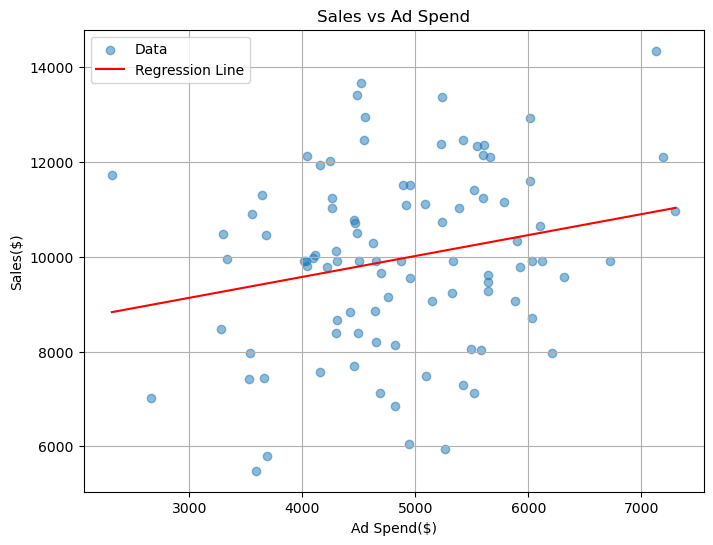

In [29]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['ad_spend'],df['sales'],alpha=0.5,label='Data')
x_range=np.linspace(df['ad_spend'].min(),df['ad_spend'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='red',label='Regression Line')
plt.title('Sales vs Ad Spend')
plt.xlabel('Ad Spend($)')
plt.ylabel('Sales($)')
plt.legend()
plt.grid(True)
plt.show()

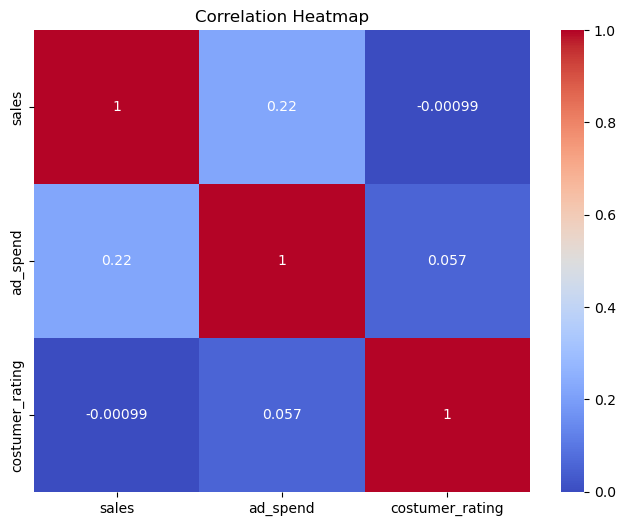

In [31]:
#Statistical visualization(Bosplot?Heatmap) via Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='region',y='sales',data=df)
plt.title('Sales Distribution by Region')
plt.savefig('sales_by_region.png')
plt.close()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()